### 학습목표
- 감성분석의 원리를 이해하고 활용할 수 있다.
- 임베딩방법론을 이해하고 활용할 수 있다.

#### 텍스트마이닝
 - 비정형 텍스트 데이터에서 의미를 추출하는 작업

#### 1. 감성분석
- 텍스트데이터에서 작성자의 기분, 태도, 감정 등을 파악하는 분석
- 감성분석을 하는 방법은 크게 2가지가 있음(감성사전을 사전에 구축하고 단어의 빈도를 측정하는 방법, 인공지능 모델을 이용해 긍/부정 문장을 학습시키는 방법)

https://github.com/smilegate-ai/korean_unsmile_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
%cd "/content/drive/MyDrive/LGDXSCHOOL 2기/신규가치분석"

/content/drive/MyDrive/LGDXSCHOOL 2기/신규가치분석


In [95]:
import pandas as pd

train = pd.read_csv('./data/unsmile_train_v1.0.tsv', delimiter='\t')
test = pd.read_csv('./data/unsmile_valid_v1.0.tsv', delimiter='\t')

In [3]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      3737 non-null   object
 1   여성/가족   3737 non-null   int64 
 2   남성      3737 non-null   int64 
 3   성소수자    3737 non-null   int64 
 4   인종/국적   3737 non-null   int64 
 5   연령      3737 non-null   int64 
 6   지역      3737 non-null   int64 
 7   종교      3737 non-null   int64 
 8   기타 혐오   3737 non-null   int64 
 9   악플/욕설   3737 non-null   int64 
 10  clean   3737 non-null   int64 
 11  개인지칭    3737 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 350.5+ KB


None

In [4]:
display(train)

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0


#### 2. 데이터 클렌징
- 오타 및 띄어쓰기 교정
- 이모지 제거
- 불용어 등록 및 처리
- 정규표현식을 이용한 전처리 등

In [5]:
from tqdm import tqdm
import re # 정규표현식

In [6]:
# 패턴생성
p=re.compile("[ㅋㅎㄷㅇㅜㅠㅉ>~!?.0-9a-zA-Z]+")
train_clean=[] # 전처리된 전체 텍스트를 담을 리스트
for doc in tqdm(train['문장']): # 약 1만 5천번 반복
  temp=[] # 전처리된 문장의 토큰이 들어갈 리스트
  for token in doc.split(" "): # 한 문장을 띄어쓰기 중심으로 토큰화
    if p.search(token): # 정규표현식 패턴에 매칭되는지 확인
      continue
    if len(token)<2 : # 1글자 이상만
      continue
    temp.append(token)
  # 클렌징된 토큰 묶음을 하나의 문장으로 만들어서 추가
  train_clean.append(" ".join(temp))

100%|██████████| 15005/15005 [00:00<00:00, 33109.31it/s]


In [7]:
p=re.compile("[ㅋㅎㄷㅇㅜㅠㅉ>~!?.0-9a-zA-Z]+")
test_clean=[] # 전처리된 전체 텍스트를 담을 리스트
for doc in tqdm(test['문장']): # 약 1만 5천번 반복
  temp=[] # 전처리된 문장의 토큰이 들어갈 리스트
  for token in doc.split(" "): # 한 문장을 띄어쓰기 중심으로 토큰화
    if p.search(token): # 정규표현식 패턴에 매칭되는지 확인
      continue
    if len(token)<2 : # 1글자 이상만
      continue
    temp.append(token)
  # 클렌징된 토큰 묶음을 하나의 문장으로 만들어서 추가
  test_clean.append(" ".join(temp))

100%|██████████| 3737/3737 [00:00<00:00, 20306.91it/s]


In [8]:
train_clean[:20]

['일안하는 시간은 쉬고싶어서 그런게 아닐까',
 '아동성범죄와 페도버는 기록바 끊어져 영원히 고통 무슬림 떨어지고 출산 위험은',
 '루나 솔로앨범 나왔을 때부터 머모 기운 있었음 진짜 띵곡임 들어보셈"',
 '홍팍에도 어버이연합인가 보내요 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소',
 '아놔 여기 댓들은 여자들이 김치녀라고 먼저 여자들은 심하게 이렇게 내가 둘다 나쁜 이상도 이하도 아닌데',
 '고향가서 피방가면 동네 부럴 친구들이랑은 거르는 없이 이야기하니까 말하게 되더라 당연히 키보드를 치거나 그러지는 않는데 말하는게 많이 거칠어지긴 반성해야겠네',
 '예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼 망상 근본없는 병신 장애인 짱개 흑인 이슬람 전라도랑 동급',
 '나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임',
 '출산청같은 우리나라 계집들 의무적으로 군대보내면 해결될 정신개조부터 지할꺼 다하고 무슨 애를 낳고 무슨 자식교육을',
 '재능 ㅂㅅㅌㅊ노 합성배우고싶다이기',
 '가짜 남자는 어떻게',
 '이슬람뺨치내',
 '어린이집에 월요일에 데려다주고 금요일에 데리고 가슴이 너무 아가가 얼마나',
 '갓슬람 정희구현 테러 ㅅㅅㅅㅅ미제양키새끼들에게는 테러가 답이다좆같은 양키 씨발새끼들',
 '따고 넘어갔나보네',
 '리더십, 메시지로 내부 결속을 강화하고 외부로 이미지를 구축하여 다시 교회로 모일수 있기를 소망하고 기도합니다',
 '협박스킬은 패시브랑께',
 '위로와 격려를 호텔에서 저여자도 정상은 아니구만 완전 지네 할아버지보다 나이가 많을듯한데 둘다 그렇게 더러운짓은 하고 설교를 어떻게',
 '메틸 알콜 집에서 쓰고 질문 에틸에 메틸 공업용 에틸 알콜은 면세라 불법적으로 술제조 때문에 정도 메틸이 들어가면서 제조방지용으로',
 '띄울사람이 진짜 없긴 없나보다']

####3.  토큰화 및 수치화
- 토큰화 : 일정 단위로 텍스트를 분리하는 작업
  - 단어(띄어쓰기)
  - 글자(char)
  - n-gram(유니,바이,트라이 등)
  - 형태소, 품사
- 수치화 : 의미있는 정보를 담고 있는 숫자형태로 변환하는 방법 -> 데이터를 정형화하는 효과가 있다
  - 빈도기반(랭킹, BOW, tf-idf)
  - embedding (word, document)

###### BOW (Bag Of Word)
- 문장에서 특정 단어의 등장 빈도를 수치화하는 방법
- 특징 1 : 문장에서 단어의 순서를 고려하기 않는다(문맥x -> 자연어처리에 부적합)
- 특징 2 : 말뭉치에서 사용되는 단어가 많으면 부피가 비례해서 커진다(의미있는 정보를 가지는 숫자는 적고 0과 같이 불필요한 정보량이 많아진다)

In [ ]:
# 1. 오늘 집에서 밥을 먹었다
# 2. 오늘 나는 집에 간다
# 3. 오늘 나는 밥을 먹었다
# 4. 내일 나는 밥을 먹었다
# 단어사전 총 8개의 단어로 이루어짐

In [9]:
from sklearn.feature_extraction.text import CountVectorizer # BOW를 구현할 클래스

In [10]:
sample_text = ["나는 오늘 저녁에 치킨을 먹을꺼야","너는 오늘 저녁에 무엇을 먹을꺼니?",
               "나는 오늘 아침에 운동을 하고 왔어","어제 저녁에 운동을 했더니 배가 많이 고프다"]

In [11]:
# step1 : 토큰화 및 단어사전 구축
sample_cv = CountVectorizer()
sample_cv.fit(sample_text)

CountVectorizer()

In [12]:
sample_cv.vocabulary_

{'나는': 1,
 '오늘': 10,
 '저녁에': 13,
 '치킨을': 14,
 '먹을꺼야': 5,
 '너는': 2,
 '무엇을': 6,
 '먹을꺼니': 4,
 '아침에': 8,
 '운동을': 12,
 '하고': 15,
 '왔어': 11,
 '어제': 9,
 '했더니': 16,
 '배가': 7,
 '많이': 3,
 '고프다': 0}

In [13]:
# step2 : 단어사전을 기반으로 각 문장에서 단어의 빈도를 측정
result = sample_cv.transform(sample_text)
result

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [14]:
result.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]])

###### Tf-idf

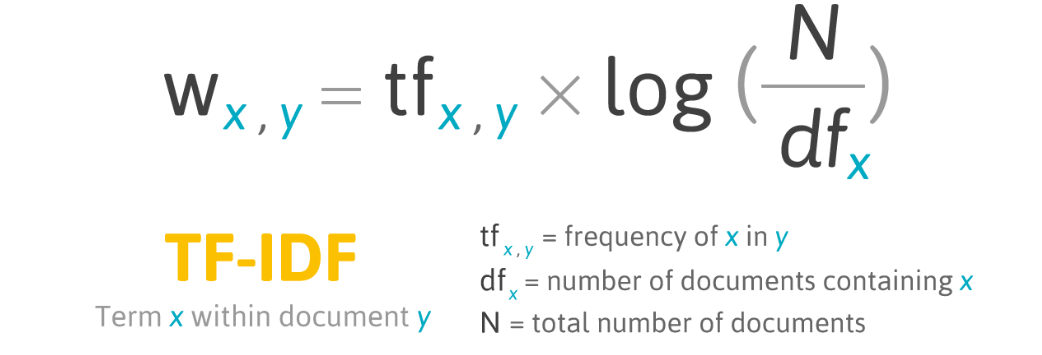

- TF(Term Frequency) : 하나의 문서(document)에서 개별 단어들이 등장하는 빈도 수
- DF(Document Frequency) : 하나의 단어(토큰)가 전체 말뭉치에 등장하는 수(문서) : 전체 말뭉치에서 고루고루 쓰이는가?

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
sample_tf_idf = TfidfVectorizer()

# step1 : 토큰화 및 단어사전 구축
sample_tf_idf.fit(sample_text)
# 단어사전 확인
sample_tf_idf.vocabulary_

{'나는': 1,
 '오늘': 10,
 '저녁에': 13,
 '치킨을': 14,
 '먹을꺼야': 5,
 '너는': 2,
 '무엇을': 6,
 '먹을꺼니': 4,
 '아침에': 8,
 '운동을': 12,
 '하고': 15,
 '왔어': 11,
 '어제': 9,
 '했더니': 16,
 '배가': 7,
 '많이': 3,
 '고프다': 0}

In [17]:
len(sample_tf_idf.vocabulary_)

17

In [18]:
# stap2: 수치화
result2 = sample_tf_idf.transform(sample_text)
result2

<4x17 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [19]:
result2.toarray()

array([[0.        , 0.42530476, 0.        , 0.        , 0.        ,
        0.53944516, 0.        , 0.        , 0.        , 0.        ,
        0.34432086, 0.        , 0.        , 0.34432086, 0.53944516,
        0.        , 0.        ],
       [0.        , 0.        , 0.51199172, 0.        , 0.51199172,
        0.        , 0.51199172, 0.        , 0.        , 0.        ,
        0.32679768, 0.        , 0.        , 0.32679768, 0.        ,
        0.        , 0.        ],
       [0.        , 0.36559366, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46370919, 0.        ,
        0.29597957, 0.46370919, 0.36559366, 0.        , 0.        ,
        0.46370919, 0.        ],
       [0.40726515, 0.        , 0.        , 0.40726515, 0.        ,
        0.        , 0.        , 0.40726515, 0.        , 0.40726515,
        0.        , 0.        , 0.32109252, 0.25995207, 0.        ,
        0.        , 0.40726515]])

###### 혐오표현 데이터 토큰화 및 수치화

In [20]:
unsmile_cv = CountVectorizer(stop_words=["으로","이다","하고","부터"], ngram_range=(1,2), # 불용어 등록, 유니1,바이2,트라이3 / 여기서는 바이 사용
                             max_df=0.7, min_df=10) # 최대 70% 그 이상은 제외, 최소 10번 이상 등장
unsmile_tf_idf = TfidfVectorizer(stop_words=["으로","이다","하고","부터"], ngram_range=(1,2), # 불용어 등록, 유니1,바이2,트라이3 / 여기서는 바이 사용
                             max_df=0.7, min_df=10)

- 불용어를 제외하고, 1-그램과 2-그램을 사용하여, 최소 10번 이상 등장하고 최대 70% 문서에서 등장하는 단어들을 벡터화하는 설정


#### 4. 모델학습

In [21]:
# step1 : 토큰화 및 단어사전 구축
unsmile_cv.fit(train_clean)
unsmile_tf_idf.fit(train_clean)

# step2 수치화
X_train_BOW =  unsmile_cv.transform(train_clean)
X_test_BOW = unsmile_cv.transform(test_clean)
X_train_tf_idf = unsmile_tf_idf.transform(train_clean)
X_test_tf_idf = unsmile_tf_idf.transform(test_clean)

In [22]:
display(X_train_BOW)
display(X_test_BOW)
display(X_train_tf_idf)
display(X_test_tf_idf)   # 1052개로 이루어짐

<15005x1052 sparse matrix of type '<class 'numpy.int64'>'
	with 27966 stored elements in Compressed Sparse Row format>

<3737x1052 sparse matrix of type '<class 'numpy.int64'>'
	with 6457 stored elements in Compressed Sparse Row format>

<15005x1052 sparse matrix of type '<class 'numpy.float64'>'
	with 27966 stored elements in Compressed Sparse Row format>

<3737x1052 sparse matrix of type '<class 'numpy.float64'>'
	with 6457 stored elements in Compressed Sparse Row format>

#### 4. 모델학습
- 감성분석의 입력으로 들어가는 데이터가 칼럼이 많은 편이라 선형모델이 보통 적합하다

In [23]:
# 정답데이터 추출
train.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [24]:
train.loc[:,"여성/가족":"clean"].values

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
train.loc[:,"여성/가족":"clean"].values.argmax(axis=1)

array([9, 6, 9, ..., 0, 8, 4])

- 첫 번째 문항은 9번(clean)에 속하는 문장이다

In [26]:
y_train = train.loc[:,"여성/가족":"clean"].values.argmax(axis=1)
y_test = test.loc[:,"여성/가족":"clean"].values.argmax(axis=1)

y_train.shape, y_test.shape

((15005,), (3737,))

In [27]:
from sklearn.linear_model import LogisticRegression # 선형 분류모델
from sklearn.model_selection import cross_val_score # 교차검증 함수

In [28]:
# 선형 분류 모델
logi = LogisticRegression()
# 교차검증
score_BOW = cross_val_score(logi, X_train_BOW, y_train, cv=5)
score_tf_idf = cross_val_score(logi, X_train_tf_idf, y_train, cv=5)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [29]:
# 결과 확인
print("BOW 점수 : ",score_BOW.mean())
print("Tf-idf 점수 : ",score_tf_idf.mean())

BOW 점수 :  0.43232255914695095
Tf-idf 점수 :  0.4290569810063312


- 처참한 확률 점수

######하이퍼파라미터 튜닝
- 모델의 주요 파라미터를 수정하여 최적화하는 기법
- 규제, 파이프라인 사용해보자

In [42]:
# tf-idf와 logistic 두 개를 묶어서 튜닝해보자(파이프라인 구축)
from sklearn.pipeline import Pipeline

In [77]:
# 파이프라인 생성
unsmile_pipeline = Pipeline([('unsmile_tf_idf',TfidfVectorizer()),
                        ('unsmile_logi',LogisticRegression())])

In [78]:
# 튜닝할 파라미터 종류 생성
grid_params={'unsmile_tf_idf__ngram_range':[(1,1),(1,2),(1,3)],
             'unsmile_tf_idf__min_df':[3,4,7,10],
             'unsmile_logi__C':[0.001,0.01,0.1,1,10,100]} # 규제(C)가 강력한것(0.001)부터 약한것(100)까지, 과적합 방지

- 3 * 4 * 6 = 72가지 조합 생성됨

In [79]:
# 그리드서치 객체 생성
from sklearn.model_selection import GridSearchCV

In [80]:
grid = GridSearchCV(unsmile_pipeline, # 튜닝할 모델(파이프라인)
                    grid_params, # 테스트할 파라미터 조합
                    cv=3, n_jobs=-1) # 교차검증 횟수, PC의 자원을 최대화

In [81]:
grid.fit(train_clean, y_train) # train_clean-> 클렌징만 한 글자 데이터

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_tf_idf', TfidfVectorizer()),
                                       ('unsmile_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'unsmile_logi__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'unsmile_tf_idf__min_df': [3, 4, 7, 10],
                         'unsmile_tf_idf__ngram_range': [(1, 1), (1, 2),
                                                         (1, 3)]})

In [82]:
# best score
grid.best_score_

0.435788571993718

- 43%로 형편없는 모델

In [83]:
# best param 조합
grid.best_params_

{'unsmile_logi__C': 1,
 'unsmile_tf_idf__min_df': 3,
 'unsmile_tf_idf__ngram_range': (1, 3)}

In [84]:
# best model
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('unsmile_tf_idf',
                 TfidfVectorizer(min_df=3, ngram_range=(1, 3))),
                ('unsmile_logi', LogisticRegression(C=1))])

###### 데트스 데이터 활용 평가

In [85]:
# 분류평가지표 리포팅
from sklearn.metrics import classification_report

In [86]:
# 예측값(테스트)
y_pred = best_model.predict(test_clean)
print(classification_report(y_test, y_pred)) # 실제정답, 모델의 예측값

              precision    recall  f1-score   support

           0       0.55      0.32      0.41       394
           1       0.75      0.38      0.50       325
           2       0.84      0.39      0.53       261
           3       0.69      0.39      0.50       387
           4       0.92      0.20      0.32       122
           5       0.80      0.35      0.49       222
           6       0.75      0.28      0.41       223
           7       0.33      0.01      0.02        82
           8       0.34      0.37      0.35       786
           9       0.37      0.76      0.50       935

    accuracy                           0.45      3737
   macro avg       0.63      0.34      0.40      3737
weighted avg       0.55      0.45      0.44      3737



- 3,5,9번
-  0.50  0.49   0.50  -> f1-score 높았다

##### 5. 클래스 수를 줄여서 모델링 다시 해보기
- 3번, 5번, 9번 (인종/국적, 지역, clean) 클래스를 분류하는 모델 제작

In [ ]:
# 데이터 필터링 case 1
def data_filtering(row) :
  if row["여성/가족":"clean"].values.argmax() in [3,5,9] :
    return row

filtering_data = train.apply(data_filtering,axis=1)
filtering_data.dropna(inplace=True)
filtering_data.shape

filtering_data_test = test.apply(data_filtering,axis=1)
filtering_data_test.dropna(inplace=True)
filtering_data_test.shape

In [141]:
# 데이터 필터링 case 2
train2 = train.loc[ (train["인종/국적"] == 1) | (train["지역"] == 1) | (train["clean"] == 1),
                           ["문장","인종/국적","지역","clean"]]

test2 = test.loc[ (test["인종/국적"] == 1) | (test["지역"] == 1) | (test["clean"] == 1),
                           ["문장","인종/국적","지역","clean"]]
test2.shape

# 정답데이터 추출
y_train2 = train2.loc[:, "인종/국적":"clean"].values.argmax(axis=1)
y_test2 = test2.loc[:, "인종/국적":"clean"].values.argmax(axis=1)

y_train2.shape, y_test2.shape

((6431,), (1600,))

In [142]:
# 클렌징
p=re.compile("[ㅋㅎㄷㅇㅜㅠㅉ>~!?.0-9a-zA-Z]+")
train_clean2=[]
for doc in tqdm(train2['문장']):
  temp=[]
  for token in doc.split(" "):
    if p.search(token):
      continue
    if len(token)<2 :
      continue
    temp.append(token)
  train_clean2.append(" ".join(temp))

test_clean2=[]
for doc in tqdm(test2['문장']):
  temp=[]
  for token in doc.split(" "):
    if p.search(token):
      continue
    if len(token)<2 :
      continue
    temp.append(token)
  test_clean2.append(" ".join(temp))

100%|██████████| 1600/1600 [00:00<00:00, 168344.53it/s]


In [143]:
unsmile_pipeline2 = Pipeline([('unsmile_tf_idf2',TfidfVectorizer()),('unsmile_logi2',LogisticRegression())])

grid_params={'unsmile_tf_idf2__ngram_range':[(1,1),(1,2),(1,3)],
             'unsmile_tf_idf2__min_df':[3,4,7,10],
             'unsmile_logi2__C':[0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(unsmile_pipeline2, # 튜닝할 모델(파이프라인)
                    grid_params, # 테스트할 파라미터 조합
                    cv=3, n_jobs=-1) # 교차검증 횟수, PC의 자원을 최대화

grid.fit(train_clean2, y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_tf_idf2', TfidfVectorizer()),
                                       ('unsmile_logi2',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'unsmile_logi2__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'unsmile_tf_idf2__min_df': [3, 4, 7, 10],
                         'unsmile_tf_idf2__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [144]:
print('best_score',grid.best_score_)
print('best_params',grid.best_params_)
best_model2 = grid.best_estimator_
print('best_model2',best_model2)

y_pred2 = best_model2.predict(test_clean2)
print(classification_report(y_test2, y_pred2))

best_score 0.7272592793150441
best_params {'unsmile_logi2__C': 1, 'unsmile_tf_idf2__min_df': 3, 'unsmile_tf_idf2__ngram_range': (1, 1)}
best_model2 Pipeline(steps=[('unsmile_tf_idf2', TfidfVectorizer(min_df=3)),
                ('unsmile_logi2', LogisticRegression(C=1))])
              precision    recall  f1-score   support

           0       0.82      0.48      0.61       426
           1       0.86      0.38      0.53       239
           2       0.73      0.97      0.83       935

    accuracy                           0.75      1600
   macro avg       0.80      0.61      0.66      1600
weighted avg       0.77      0.75      0.73      1600



- support는 각 클래스의 실제 데이터 포인트의 개수
- fl-score값이 향상되었다

##### 6. 특정 클래스 분류에 영향을 준 단어를 확인해보자

In [146]:
# 3가지 분류를 수행하도록 학습된 tf-idf
unsmile_tf_idf2 = best_model2.steps[0][1]
unsmile_tf_idf2

TfidfVectorizer(min_df=3)

In [147]:
# 3가지 분류를 수행하도록 학습된 logi
unsmile_logi = best_model2.steps[1][1]
unsmile_logi

LogisticRegression(C=1)

In [148]:
# 단어사전 추출
unsmile_vocab=unsmile_tf_idf2.vocabulary_
len(unsmile_vocab)

1927

In [155]:
unsmile_vocab

{'그런게': 192,
 '진짜': 1652,
 '있는데': 1383,
 '이거': 1265,
 '고소': 126,
 '동네': 441,
 '거르는': 76,
 '없이': 1138,
 '당연히': 385,
 '말하는게': 550,
 '많이': 539,
 '개새끼': 59,
 '정신병자': 1515,
 '사기꾼': 797,
 '병신': 713,
 '짱개': 1660,
 '흑인': 1918,
 '이슬람': 1303,
 '전라도랑': 1479,
 '동급': 437,
 '데리고': 425,
 '가슴이': 25,
 '너무': 323,
 '얼마나': 1119,
 '테러': 1735,
 '씨발새끼들': 986,
 '이미지를': 1290,
 '다시': 371,
 '기도합니다': 217,
 '집에서': 1658,
 '쓰고': 978,
 '때문에': 485,
 '정도': 1504,
 '구구절절': 148,
 '팩트': 1756,
 '아주': 1030,
 '싫다': 953,
 '내가': 313,
 '괜히': 141,
 '확인': 1913,
 '필요': 1778,
 '이새끼': 1300,
 '전라도': 1474,
 '존나': 1552,
 '페미니스트': 1761,
 '뉴스': 343,
 '보니까': 730,
 '애들': 1074,
 '뭐야': 647,
 '먹는': 572,
 '어디': 1089,
 '없노': 1126,
 '지금': 1626,
 '이미': 1288,
 '있는': 1380,
 '가도': 17,
 '이제': 1319,
 '별로': 712,
 '댓글로': 419,
 '대구': 392,
 '누구': 340,
 '현실은': 1888,
 '그렇게': 195,
 '좋으면': 1585,
 '이런': 1278,
 '기사': 224,
 '한국에서도': 1836,
 '개슬람': 61,
 '난민': 288,
 '다문화': 364,
 '극혐': 205,
 '맞고': 561,
 '아무리': 1019,
 '소리': 908,
 '해봤자': 1871,
 '없음': 1137,
 '뭉쳐서': 640,

- 단어사전에 1927개의 단어들이 있음
- 모델 1927개의 가중치들

In [149]:
# 가중치 추출
unsmile_coef = unsmile_logi.coef_
unsmile_coef.shape

(3, 1927)

- 학습 클래스 3개였으므로 3, 가중치 1927

In [150]:
# 지역 혐오와 관련된 가중치 추출
unsmile_coef_지역 = unsmile_logi.coef_[1]
len(unsmile_coef_지역)

1927

In [151]:
unsmile_coef_지역

array([-0.20755902,  0.08332872,  0.19553552, ..., -0.18555696,
       -0.1136194 , -0.11139595])

In [152]:
unsmile_logi.coef_[0] # 인종/국적

array([-0.02287877,  0.4841551 ,  1.0390027 , ..., -0.06481738,
       -0.19115892, -0.18578296])

In [153]:
len(unsmile_logi.coef_[0])

1927

In [166]:
# df로 변환
unsmile_df = pd.DataFrame([unsmile_vocab.keys(), unsmile_vocab.values()]).T
unsmile_df.sort_values(by=1)

,0,1
404,ㄱㄱ,0
1293,ㄴㄴ,1
1416,ㅅㅂ,2
1628,ㅅㅅ,3
658,ㅆㅂ,4
...,...,...
1553,희망이,1922
1619,히잡,1923
859,힘들게,1924
1308,힘들어,1925


In [167]:
unsmile_df= unsmile_df.sort_values(by=1).set_index(1) # 1은 가중치, 0은 단어
unsmile_df['지역혐오 가중치'] = unsmile_coef_지역
unsmile_df.sort_values(by='지역혐오 가중치', ascending=False).head(30)

,0,지역혐오 가중치
1,,
1474,전라도,3.605810
973,쌍도,2.912236
116,경상도,2.764896
1899,홍어,2.719201
1478,전라도는,2.599233
66,개쌍도,2.514832
507,라도,2.439329
1475,전라도가,2.407881
392,대구,2.325710


In [169]:
unsmile_df = pd.DataFrame([unsmile_vocab.keys(), unsmile_vocab.values()]).T
unsmile_df= unsmile_df.sort_values(by=1).set_index(1) # 1은 가중치, 0은 단어
unsmile_df['인종혐오 가중치'] = unsmile_logi.coef_[0]
unsmile_df.sort_values(by='인종혐오 가중치', ascending=False).head(30)

,0,인종혐오 가중치
1,,
1536,조선족,3.426823
1664,짱깨,2.964684
61,개슬람,2.579408
497,똥남아,2.342838
1606,중국,2.264466
364,다문화,2.135540
1738,토착왜구,2.133830
438,동남아,2.099222
1541,조선족은,2.083808
